**Import Library**

In [6]:
# NAMA    : Adi Setyo Nugroho 
# NRP     : 6025201003
# KELAS   : Topik Dalam Data Mining - A
# TUGAS   : Program Klustering

# library untuk baca excel
import pandas as pd
import numpy as np

# library plotting
import matplotlib.pyplot as plt

# library normalisasi data
from sklearn.preprocessing import StandardScaler

# library untuk clustering
from sklearn.cluster import KMeans

# library silhouette score (evaluasi)
from sklearn.metrics import silhouette_score

# library untuk visualisasi
import seaborn as sns

# library reduksi fitur
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

**Koneksi dengan google drive dan memanggil file dataset**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

data_path = r'/content/drive/My Drive/Colab Notebooks/Data Mining/Tugas 5/Data/dataset.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Membaca Data**

In [8]:
# membaca data
dataset = pd.read_csv(data_path)

**Preprocessing Data**

In [9]:
# menghapus kolom id
dataset.drop(labels='CUST_ID', axis=1, inplace = True)

# memeriksa null value
dataset.isnull().sum().sort_values(ascending = False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
TENURE                                0
PURCHASES_FREQUENCY                   0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PRC_FULL_PAYMENT                      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
PAYMENTS                              0
BALANCE                               0
dtype: int64

In [10]:
# mengisi nilai null pada dataset dengan nilai mean kolom tersebut
dataset.loc[(dataset['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = dataset['MINIMUM_PAYMENTS'].mean()
dataset.loc[(dataset['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = dataset['CREDIT_LIMIT'].mean()

dataset.isnull().sum().sort_values(ascending = False)

TENURE                              0
ONEOFF_PURCHASES_FREQUENCY          0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
PURCHASES_INSTALLMENTS_FREQUENCY    0
PRC_FULL_PAYMENT                    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
BALANCE                             0
dtype: int64

In [11]:
norm = StandardScaler()
norm_data = norm.fit_transform(dataset)

# membuat dataframe
df = pd.DataFrame(norm_data, columns = dataset.columns)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-5.366135e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


**Mencari jumlah cluster optimal (Evaluasi) pada K-Means**

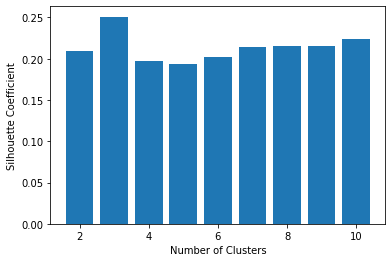

In [12]:
silhouette_scores_kmeans = [] 

for k in range(2, 11):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(df)
  score = silhouette_score(df, kmeans.labels_)
  silhouette_scores_kmeans.append(score)
  
# plt.plot(range(2, 11), silhouette_scores_kmeans)
plt.bar(range(2, 11), silhouette_scores_kmeans)
# plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

**K-Means Clustering**

In [13]:
# menentukan jumlah cluster
k = 3

# fit data ke metode clustering
kmeans = KMeans(n_clusters = k, init = 'random', max_iter = 300)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [14]:
# input label klaster ke dataframe
labels = kmeans.labels_
result = pd.concat([df, pd.DataFrame({'CLUSTER':labels})], axis=1)
result.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,0
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,1
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,0
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-5.366135e-16,-0.525551,0.36068,0
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,0


**Visualisasi lanjutan hasil K-means**

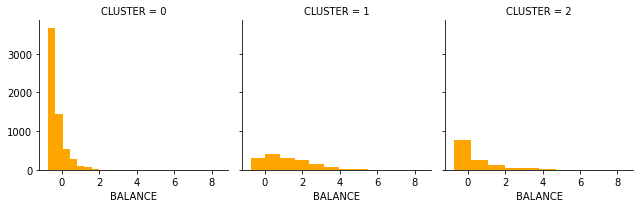

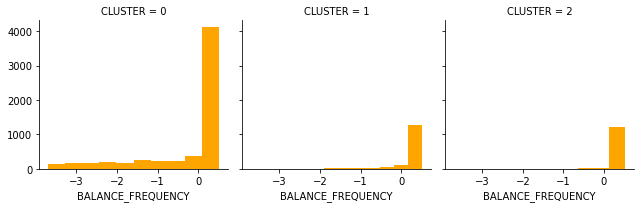

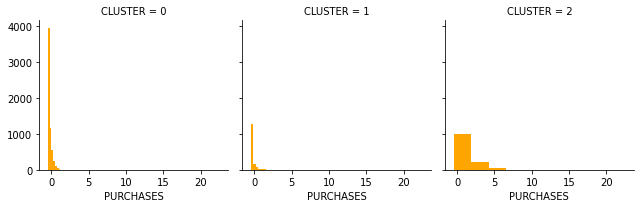

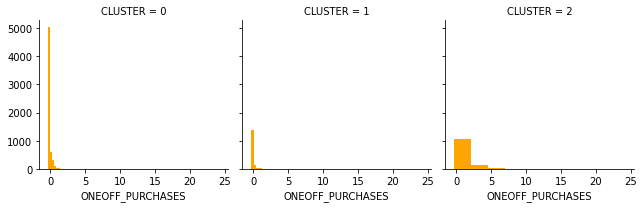

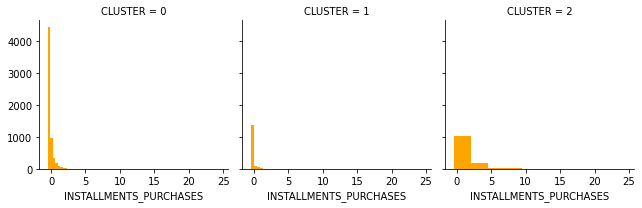

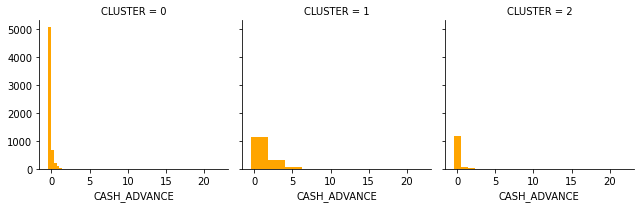

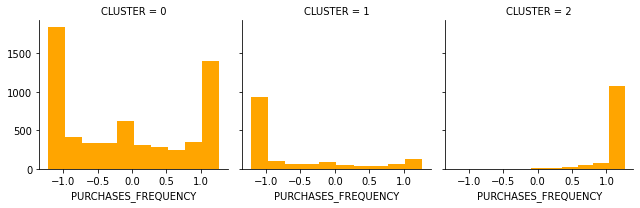

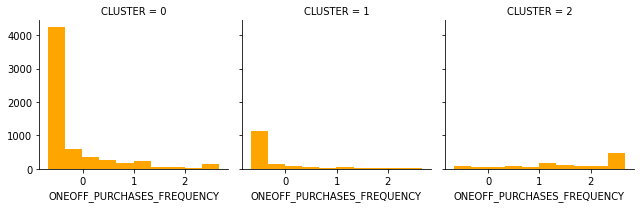

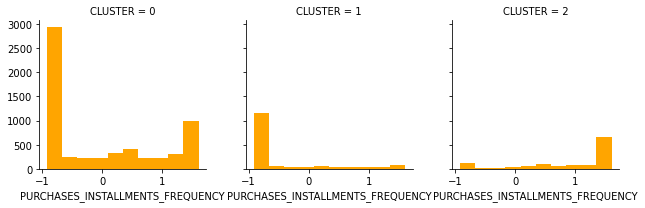

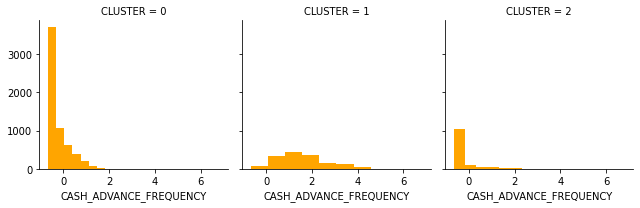

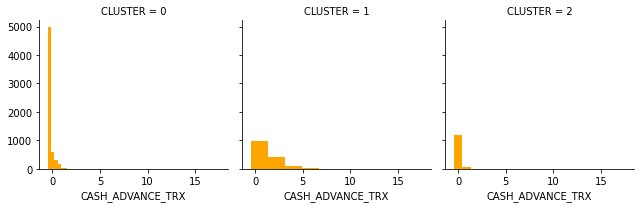

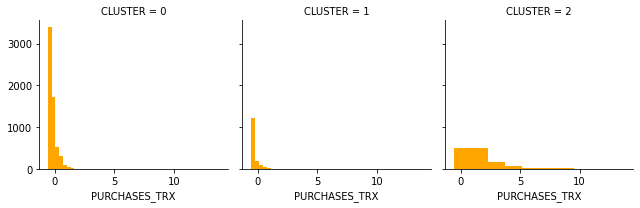

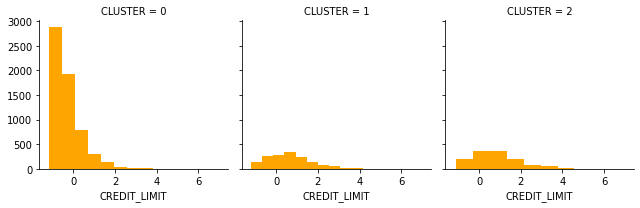

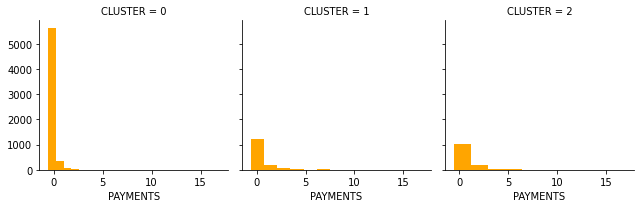

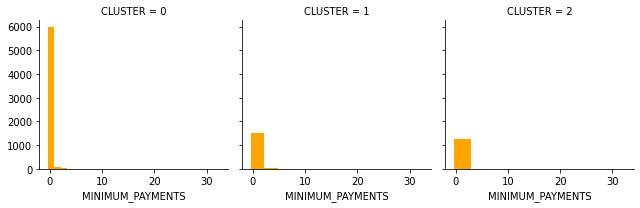

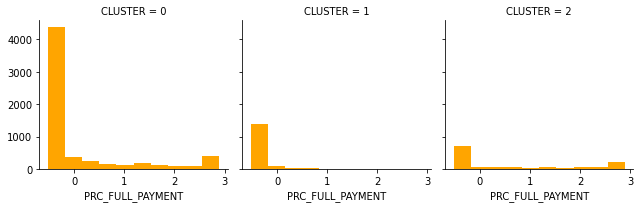

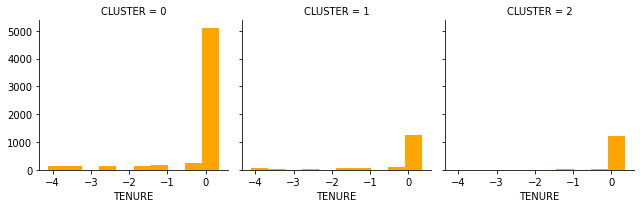

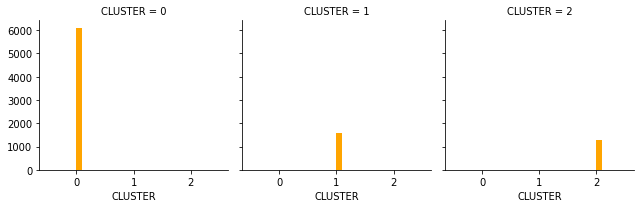

In [15]:
for i in result:
  grid = sns.FacetGrid(result, col = 'CLUSTER')
  grid.map(plt.hist, i, color = 'orange')

**Plotting Cluster**

In [16]:
# dekomposisi PCA
dist = 1 - cosine_similarity(df)

pca = PCA(n_components = 2)
pca = pca.fit_transform(dist)

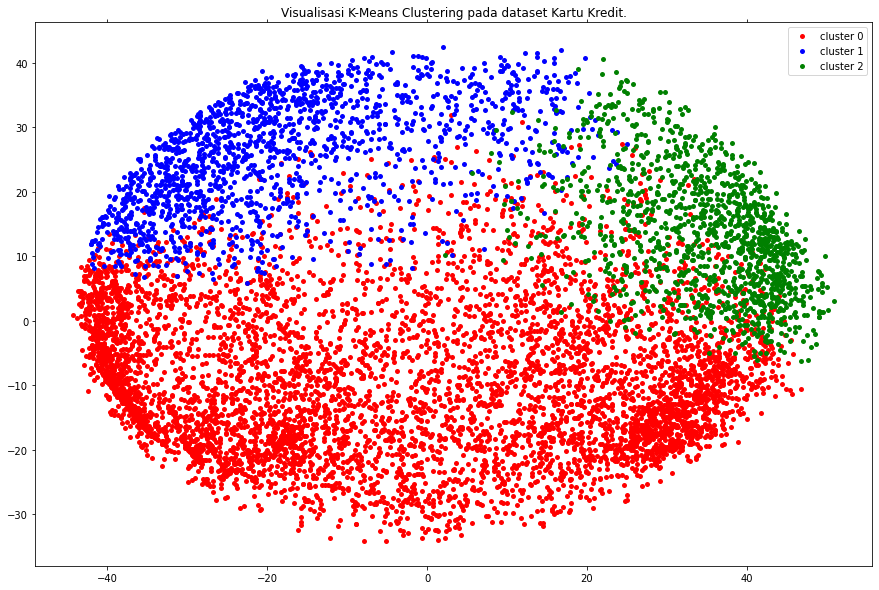

In [17]:
# visualisasi penyebaran K-Means clustering
x, y = pca[:, 0], pca[:, 1]
warna = {0: 'red', 1: 'blue', 2: 'green'}
label_pca = {0: 'cluster 0', 1: 'cluster 1', 2: 'cluster 2'}

df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')
fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=warna[name],label=label_pca[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Visualisasi K-Means Clustering pada dataset Kartu Kredit.")
plt.show()